# Investigate Hotel Business using Data Visualization

## About Data Set

This data  describes two datasets with hotel demand data. One of the hotels is a resort hotel and the other is a city hotel.

Dataset : https://drive.google.com/file/d/1JVjqiQk3wScY_4dYnc8Ee9R5qcgWd-fL/view?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Read Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/hotel_bookings_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


### Check null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

- Terdapat beberapa null values di feature `company`, `agent`, `city`, `children`

### Explore & Imput Data for missing values

- Agent : ID of the travel agency that made the booking.
      jadi pemesanan yg tidak ada id, kemungkinan memesan tidak menggunakan agent
          
- Company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
      jik null, maka kemungkinan pembayaran sendiri
            

source : https://www.sciencedirect.com/science/article/pii/S2352340918315191

In [6]:
df['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

In [7]:
# --> agent & company di impute dengan 0 karena merupakan ID 

replacements = {"agent": 0, "company": 0}
df = df.fillna(replacements)

df = df.dropna(subset=['children'])
df['city'].fillna(df['city'].mode()[0], inplace=True)

In [8]:
# children di drop karena jumlahnya kecil 

df = df.dropna(subset=['children'])

In [9]:
# city diimpute dengan mode (kota denpasar)

df['city'].fillna(df['city'].mode()[0], inplace=True)

In [10]:
# check missing value

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Check inconsistent value

In [11]:
df.shape

(119386, 29)

In [12]:
df['adr'].describe()

count    119386.000000
mean        101.833541
std          50.534664
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2018.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Terdapat angka minus (-) di column `adr`

In [14]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('_____________________________________________________')

hotel : ['Resort Hotel' 'City Hotel']
City Hotel      79326
Resort Hotel    40060
Name: hotel, dtype: int64
_____________________________________________________
arrival_date_month : ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
October      13873
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
_____________________________________________________
meal : ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
Breakfast     92306
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
_____________________________________________________
city : ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Kabupaten Tangerang' 'Kota Sema

column meal terdapat inconsisten data, 
No Meal == Undefined

In [15]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
47075,City Hotel,0,33,2018,April,6,6,1,1,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,98.30,1,1,Check-Out
40144,City Hotel,0,96,2017,September,28,11,2,1,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,17.0,0.0,0,Family,94.50,0,0,Check-Out
96972,City Hotel,0,183,2018,November,37,8,0,3,2,0.0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,44.0,0.0,0,Family,110.00,0,1,Check-Out
75719,City Hotel,1,302,2017,October,33,15,2,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,No Deposit,1.0,0.0,0,Family,62.00,0,0,Canceled
74259,City Hotel,1,267,2017,September,28,11,2,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,No Deposit,1.0,0.0,0,Family,62.80,0,0,Canceled
11054,Resort Hotel,1,132,2019,June,16,16,2,4,3,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,40.0,0.0,0,Personal,83.84,0,1,Canceled
29207,Resort Hotel,0,11,2019,August,24,14,0,4,2,0.0,0,Dinner,Kota Denpasar,Online TA,TA/TO,1,0,3,0,No Deposit,240.0,0.0,0,Personal,216.00,1,2,Check-Out
89225,City Hotel,0,72,2018,July,20,14,2,3,2,0.0,0,Breakfast,Kota Yogyakarta,Direct,Direct,0,0,0,0,No Deposit,14.0,0.0,0,Personal,127.50,0,0,Check-Out
60426,City Hotel,1,69,2018,January,46,10,1,3,2,0.0,0,Breakfast,Kota Yogyakarta,Direct,Direct,0,0,0,0,No Deposit,14.0,0.0,0,Personal,104.18,0,2,Canceled
52598,City Hotel,1,93,2018,August,24,8,0,3,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,159.30,0,0,Canceled


In [16]:
# Drop rows with negative value

df = df.loc[df.adr >= 0]

# Replace Undefined -> No Meal

df['meal'].replace({"Undefined": "No Meal"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df.shape

(119385, 29)

In [18]:
# Check aduls, children, babies, if values 0 that means there are no guest

df[(df['adults'] == 0) & (df['children'] == 0 ) & (df['babies'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,0.0,174.0,0,Family,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0.0,174.0,0,Personal,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0.0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0.0,0,Family,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2019,August,26,27,0,3,0,0.0,0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,1,No Deposit,7.0,0.0,0,Personal,100.80,0,0,Check-Out
115091,City Hotel,0,1,2019,August,26,30,0,1,0,0.0,0,No Meal,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,0.00,1,1,Check-Out
116251,City Hotel,0,44,2019,September,28,15,1,1,0,0.0,0,No Meal,Kota Surabaya,Online TA,TA/TO,0,0,0,2,No Deposit,425.0,0.0,0,Personal,73.80,0,0,Check-Out
116534,City Hotel,0,2,2019,September,28,15,2,5,0,0.0,0,No Meal,Kota Jakarta Selatan,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,0.0,0,Family,22.86,0,1,Check-Out


In [19]:
# Drop data with no guest

no_guests = list(df.loc[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df.drop(df.index[no_guests], inplace=True)




# Menganalisis jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [20]:
# agregat jumlah booking based on jenis hotel each month
df1 = df.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year' :['count','nunique']}).reset_index()
df1.columns = ['jenis_hotel','bulan','jumlah_book','jumlah_tahun']

# Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)
df1['rata2_booking'] = round(df1['jumlah_book']/ df1['jumlah_tahun'],2)
df1

# Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
df1['month'] = df1['bulan'].str[:3]
# sort
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df1['month'] = pd.Categorical(df1['month'], categories=months, ordered=True)

In [21]:
df1 = df1.sort_values(by="month")
df1

,jenis_hotel,bulan,jumlah_book,jumlah_tahun,rata2_booking,month
4,City Hotel,January,4335,2,2167.50,Jan
16,Resort Hotel,January,2435,2,1217.50,Jan
3,City Hotel,February,4118,2,2059.00,Feb
15,Resort Hotel,February,2646,2,1323.00,Feb
7,City Hotel,March,3728,2,1864.00,Mar
19,Resort Hotel,March,2191,2,1095.50,Mar
0,City Hotel,April,4947,2,2473.50,Apr
12,Resort Hotel,April,3101,2,1550.50,Apr
20,Resort Hotel,May,3334,2,1667.00,May
8,City Hotel,May,6440,2,3220.00,May


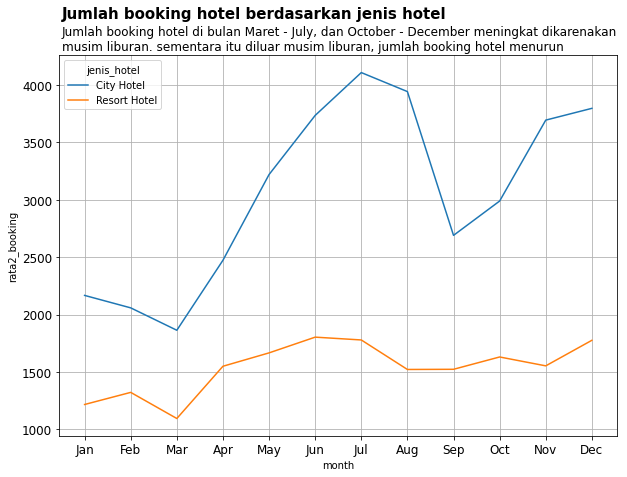

In [22]:
plt.figure(figsize=(10,7))
sns.lineplot(x='month', y='rata2_booking',hue='jenis_hotel', data=df1)


plt.text(x=-0.5, y=4580, s="Jumlah booking hotel berdasarkan jenis hotel", 
         fontsize=15, fontweight='bold')
plt.text(x=-0.5, y=4300, s="Jumlah booking hotel di bulan Maret - July, dan October - December meningkat dikarenakan \nmusim liburan. sementara itu diluar musim liburan, jumlah booking hotel menurun", 
         fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()



- Berdasarkan analisis, didapatkan bahwa jumlah booking City Hotel lebih banyak dibandingkan dengan Resort Hotel.

- Pada musim libur, tepatnya di bulan Juni - July dan November - Decebember jumlah booking hotel naik untuk setiap jenis hotel. hal ini dikarenakan banyaknya orang yang menghabiskan waktu liburan untuk menginap di hotel.

- Sedangkan jumlah booking diluar musim liburan mengalami penurunan yang significant

# Menganalisis tingkat pembatalan pemesanan

In [23]:
df2 = df.copy()

### membuat kolom baru yang berisi total durasi menginap

In [24]:
df2['total_nights'] = df2['stays_in_weekend_nights'] + df2['stays_in_weekdays_nights']
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0


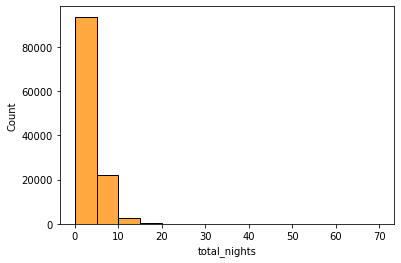

In [25]:
sns.histplot(x='total_nights',binwidth=5, data=df2, color='darkorange')

### mengelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan 

In [26]:
import numpy as np

df2['group_total'] = np.where(df2['total_nights'] > 14, 15, 
                                np.where(df2['total_nights'] > 21, 21, df2['total_nights']))
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights,group_total
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2,2


### membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel




In [27]:
df2_agg = df2.groupby(['hotel','is_canceled','group_total']).agg({'arrival_date_month' : 'count'}).reset_index()
df2_pivot = df2_agg.pivot_table(index=['hotel', 'group_total'], columns='is_canceled', values='arrival_date_month').reset_index()
df2_pivot['percent_canceled'] = round(df2_pivot[1]*100.0/ (df2_pivot[0]+df2_pivot[1]), 2) 
df2_pivot


is_canceled,hotel,group_total,0,1,percent_canceled
0,City Hotel,0,305,22,6.73
1,City Hotel,1,9133,4094,30.95
2,City Hotel,2,10972,10422,48.71
3,City Hotel,3,11870,9482,44.41
4,City Hotel,4,7675,4850,38.72
5,City Hotel,5,3214,1775,35.58
6,City Hotel,6,1109,941,45.90
7,City Hotel,7,1245,807,39.33
8,City Hotel,8,209,175,45.57
9,City Hotel,9,119,93,43.87


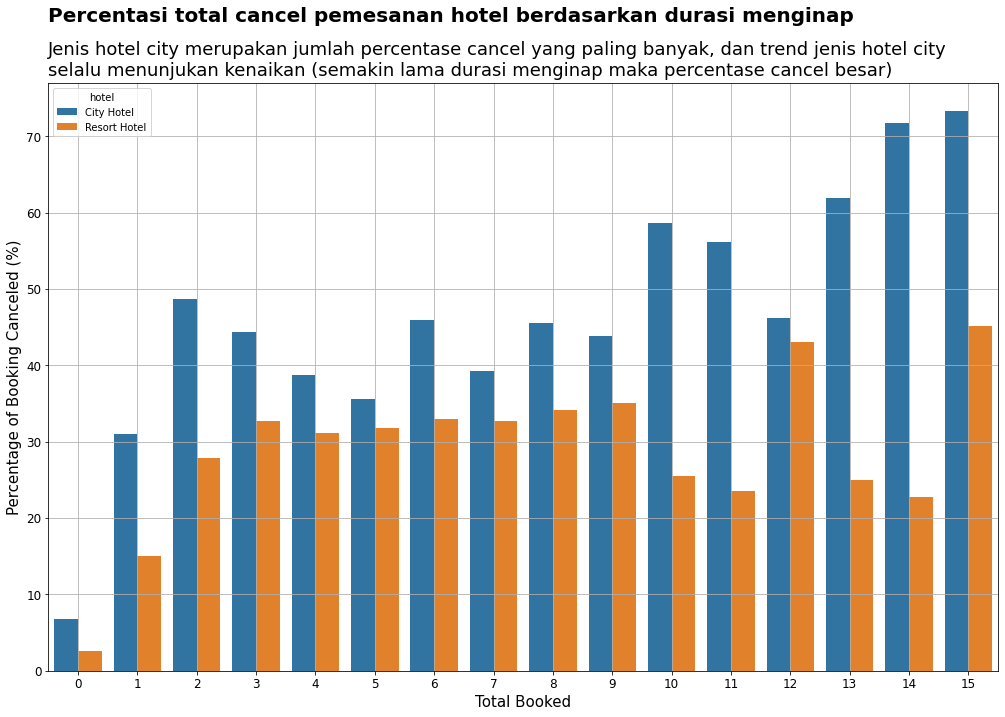

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x='group_total', y='percent_canceled', hue='hotel', data=df2_pivot)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()

plt.xlabel('Total Booked', fontsize=15) 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15) 

plt.text(x=-0.5, y=85, s="Percentasi total cancel pemesanan hotel berdasarkan durasi menginap ", 
         fontsize=20, fontweight='bold') 
plt.text(x=-0.5, y=78, s="Jenis hotel city merupakan jumlah percentase cancel yang paling banyak, dan trend jenis hotel city \nselalu menunjukan kenaikan (semakin lama durasi menginap maka percentase cancel besar)", 
         fontsize=18) 

plt.tight_layout()

- Berdasarkan hasil analisis, didapatkan bahwa lamanya durasi menginap menunjukan trend positif, dimana untuk setiap lamanya durasi menginap akan meningkatkan persentase jumlah cancel.

- Terdapat perbedaan untuk jenis hotel resort, dimana lamanya durasi menginap tidak terlalu memperbesar jumlah cancel.

# Analisis jarak waktu antara pemesanan hotel dengan hari kedatangan pelanggan terhadap tingkat pembatalan hotel

In [29]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out


In [30]:
df3 = df.copy()

In [31]:
# Mengkategorisasi kolom lead_time agar lebih sederhana
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time']) 
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels)

df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_times,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,342,330-360
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,401,390-420
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,7,0-30
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,13,0-30
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,14,0-30


In [39]:
df3_agg = df3.groupby(['hotel','is_canceled','lead_time_group']).agg({'arrival_date_month' : 'count'}).reset_index()
df3_pivot = df3_agg.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='arrival_date_month').reset_index()
df3_pivot['persen_cancel'] = round((df3_pivot[1] / (df3_pivot[0] + df3_pivot[1])) * 100, 2)
df3_pivot

is_canceled,hotel,lead_time_group,0,1,persen_cancel
0,City Hotel,0-30,18102,5182,22.26
1,City Hotel,30-60,7260,4603,38.80
2,City Hotel,60-90,5202,3687,41.48
3,City Hotel,90-120,3949,3485,46.88
4,City Hotel,120-150,3064,2542,45.34
5,City Hotel,150-180,2439,2715,52.68
6,City Hotel,180-210,1794,1793,49.99
7,City Hotel,210-240,1220,1280,51.20
8,City Hotel,240-270,880,1241,58.51
9,City Hotel,270-300,659,1858,73.82


Text(-0.5, 88, 'Jenis City hotel merupakan persentase paling besar dan menunjukkan trend positif (semakin \nbesar nlead time, maka semakin besar persentase cancel), begitu juga dengan jenis Resort \nhotel yang menunjukkan trend positif')

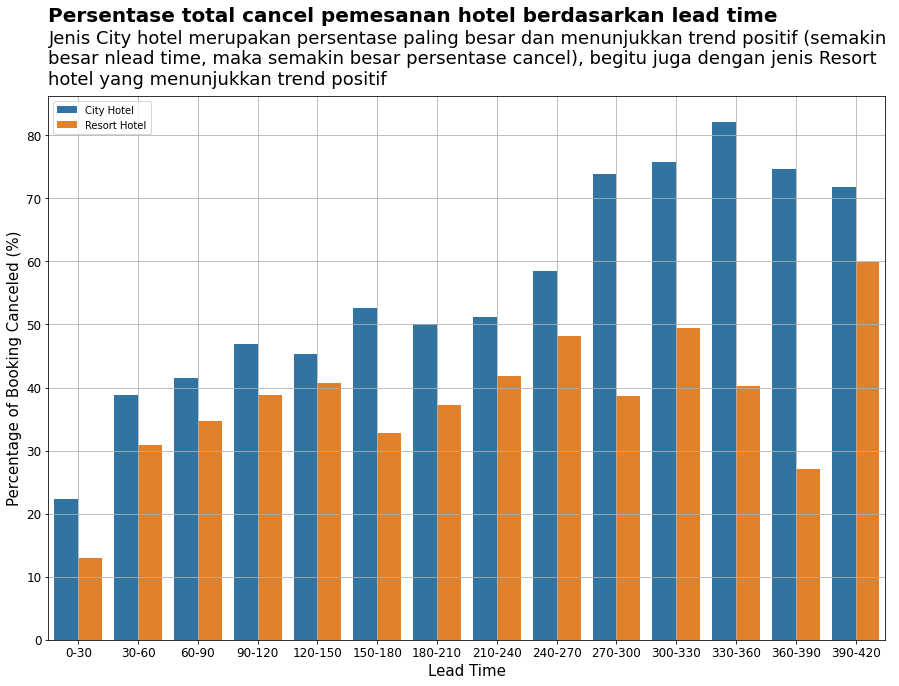

In [59]:
plt.figure(figsize= (15,10))
sns.barplot(x='lead_time_group', y='persen_cancel', hue='hotel', data=df3_pivot)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid()

plt.xlabel('Lead Time', fontsize=15) 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)

plt.legend(loc= 'upper left', title_fontsize= 15)

plt.text(x=-0.5, y=98, s="Persentase total cancel pemesanan hotel berdasarkan lead time ", 
         fontsize=20, fontweight='bold') 
plt.text(x=-0.5, y=88, s="Jenis City hotel merupakan persentase paling besar dan menunjukkan trend positif (semakin \nbesar nlead time, maka semakin besar persentase cancel), begitu juga dengan jenis Resort \nhotel yang menunjukkan trend positif", 
         fontsize=18) 


- Berdasarkan hasil analisis yang didapatkan, semakin besar total lead time maka akan semakin besar persentase cancel.

- persentase terkecil didapatkan pada lead time di rentang kurang 0-30 hari, sedangkan persentase terbesar di rentang diatas 270 hari.

- City hotel mendapatkan persentase yang lebih besar dibandingkan Resort hotel.